# Student Performance Indicator

## Problem statement

- This project tries to understand how the student's performance - test scores is affected by other variables such as gender, ethnicity, parental level of education, lunch ans test preparation course.

- Data source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

### Dataset information:

- Gender: sex of students (Male/Female)
- Race/Ethnicity: ethnicity of students (Group A, B, C, D, E)
- Parental Level of Education: parents' final education (Bachelor's degree, Some college, Master's degree, Associate's degree, High school)
- Lunch: having lunch before test (Standard or Free/reduced)
- Test Preparation Course: complete or not complete before test
- Math Score
- Reading Score
- Writing Score

## Import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import the .csv dataset

In [2]:
df = pd.read_csv('/Users/0s/Downloads/StudentsPerformance.csv')

### Top 5 Records

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Shape of the dataset

In [4]:
df.shape

(1000, 8)

## Data check to perform:

- Check missing values
- Check duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of dataset
- Check various categories present in the different categorical colums

### Check missing values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There is no missing value in the dataset.

### Check duplicates

In [6]:
df.duplicated().sum()

0

There is no duplicate value in the dataset.

### Check data type

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Check the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### Check statistics of dataset

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Observations:

- From the statistics of the dataset, all means are very close to each other, ranging from 66 to 68.05.
- All the standard deviations are also close - ranging from 14.6 to 15.19.
- The minimum score for math is 0, for reading is 17 and for writing is 10. 

### Exploring data

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
print("Categories in 'gender' variable:     ", end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:", end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ", end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [17]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']

We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### Adding columns "Total score" and "Average"

In [19]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [20]:
# Count the number of students with full marks (100) in each subject
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

# Print the count of students with full marks in each subject
print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [21]:
# Count the number of students with less than or equal to 20 marks in each subject
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

# Print the count of students with less than or equal to 20 marks in each subject
print(f'Number of students with less than or equal to 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than or equal to 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than or equal to 20 marks in Reading: {reading_less_20}')

Number of students with less than or equal to 20 marks in Maths: 4
Number of students with less than or equal to 20 marks in Writing: 3
Number of students with less than or equal to 20 marks in Reading: 1


### Observations:

- Students performed the worst in maths.
- The best performance is in reading.

## Exploring data (Visualization)

### Visualize average score distribution to make some conclusion:

- Histogram
- Kernel Distribution Function (KDE)

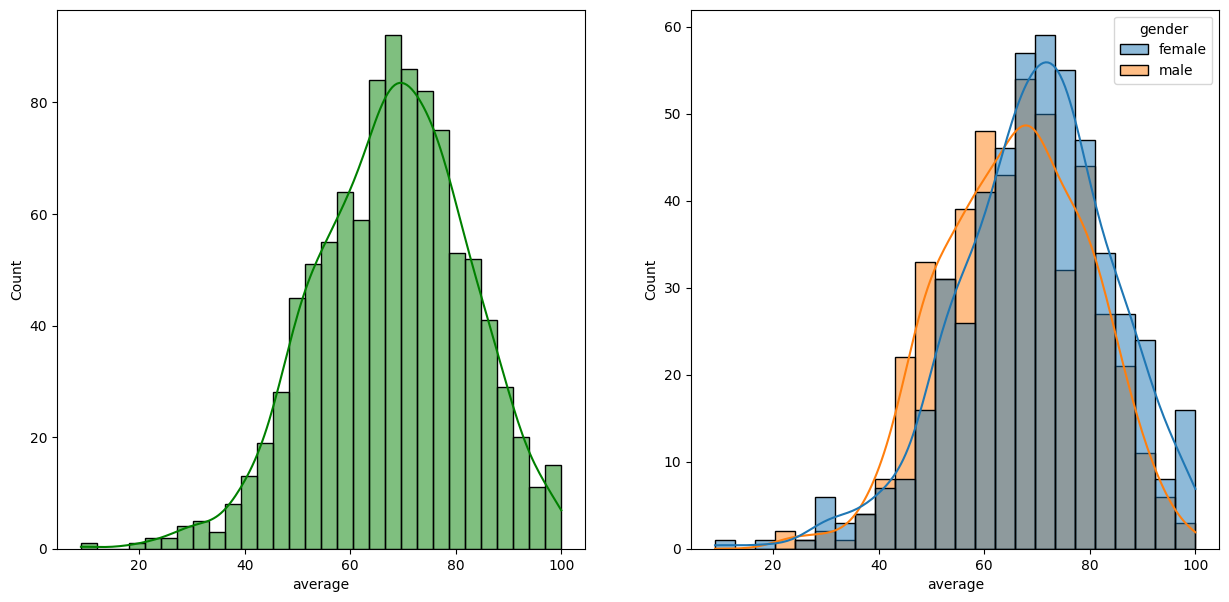

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

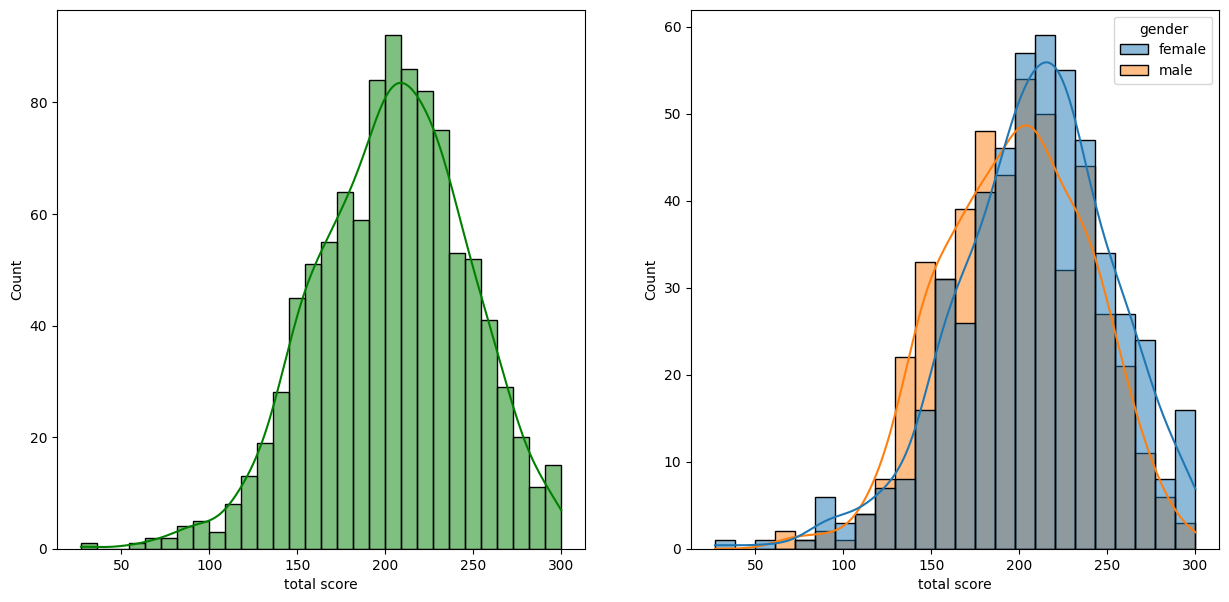

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

### Observation:

- Female students have a tendency to perform better than male students.

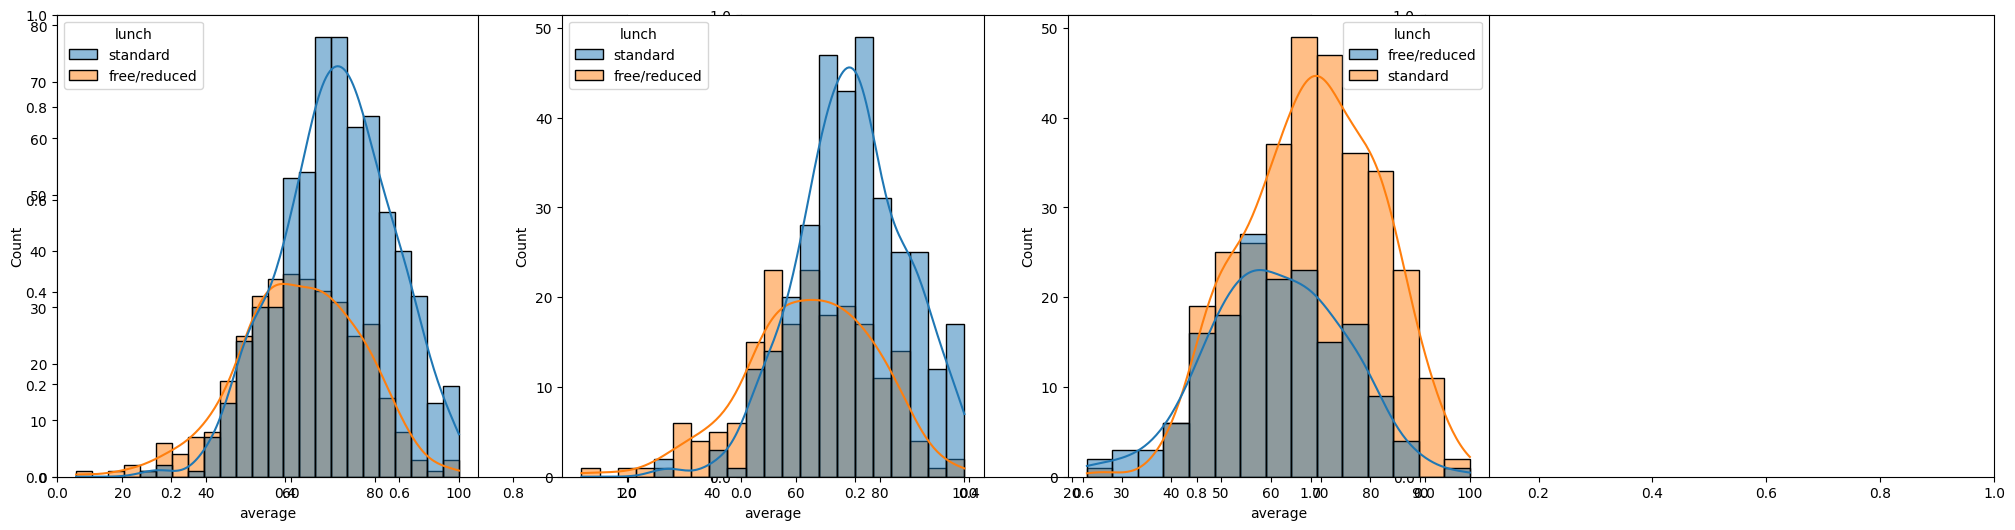

In [24]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

### Observations:

- Standard lunch helps students perform well in exams.
- Whether student is female or male, standard lunch helps them perform better than free/reduced one.

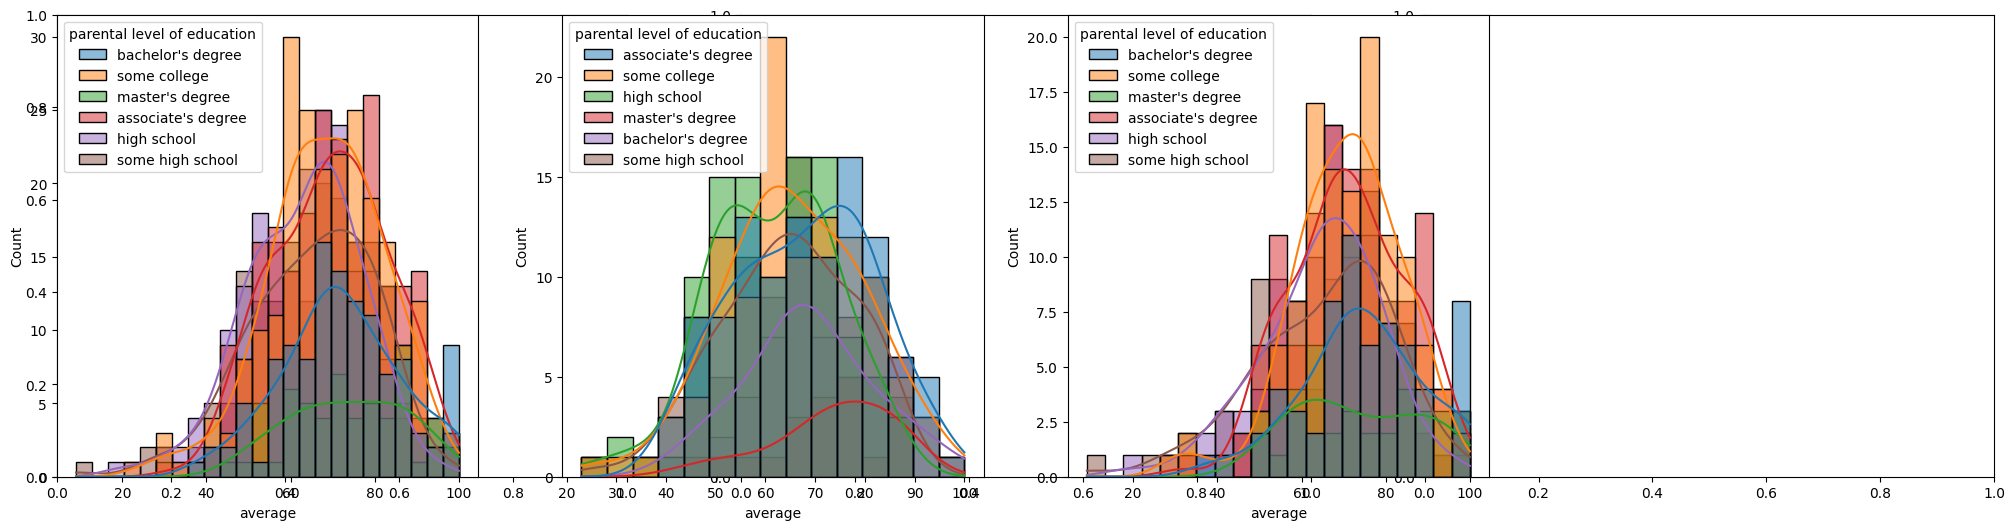

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

### Observations:

- In general, parental level of education does not affect much in students' performance in exams.
- The second plot shows that male students tend to perform better in exam when their parental level of education is associate's degree.
- But there is no effect of this feature on female students' performance.

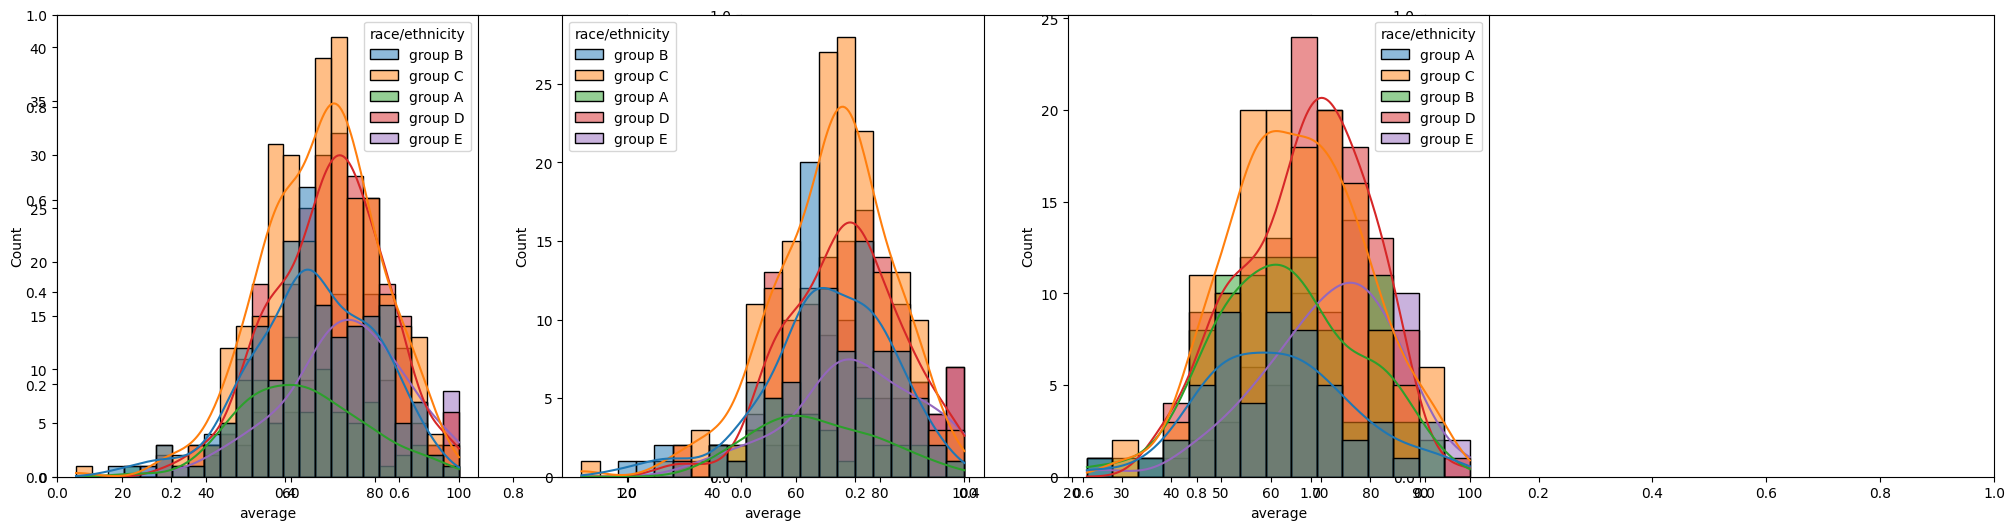

In [26]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

### Observation:

- Students in group A and B tend to perform badly in exam whether they are femal or male.

### Maximum score of students in all three subjects

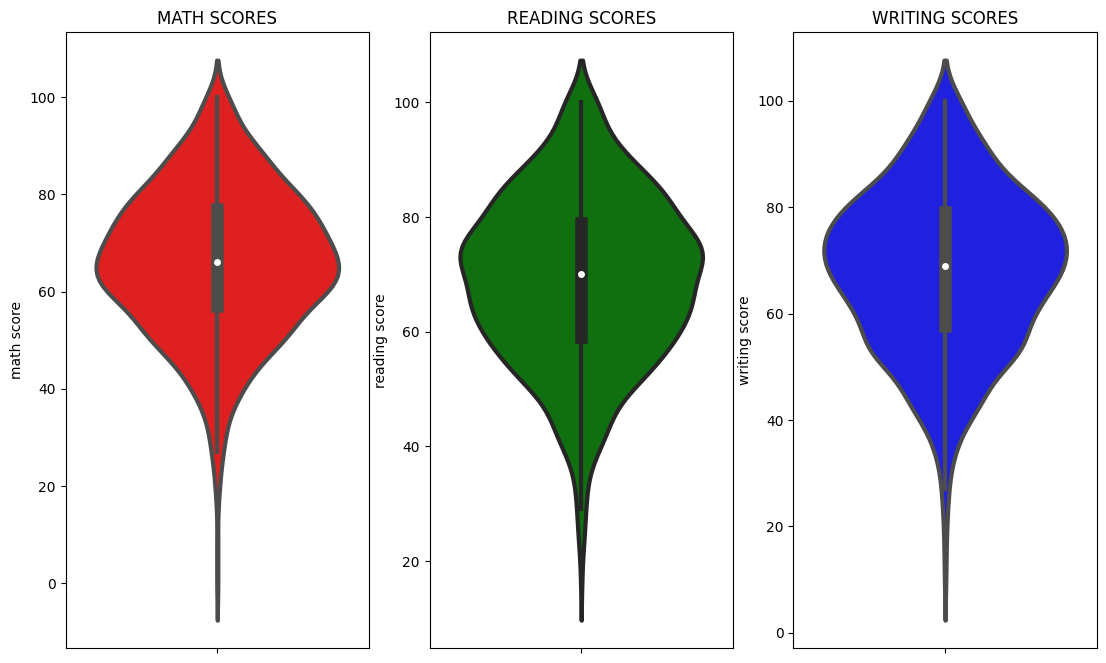

In [27]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

### Observations:

- Most of the students score is in between 60 and 80 in math, while in reading and writing it is ranging from 55 to 80.

### Multivariate analysis using pie chart

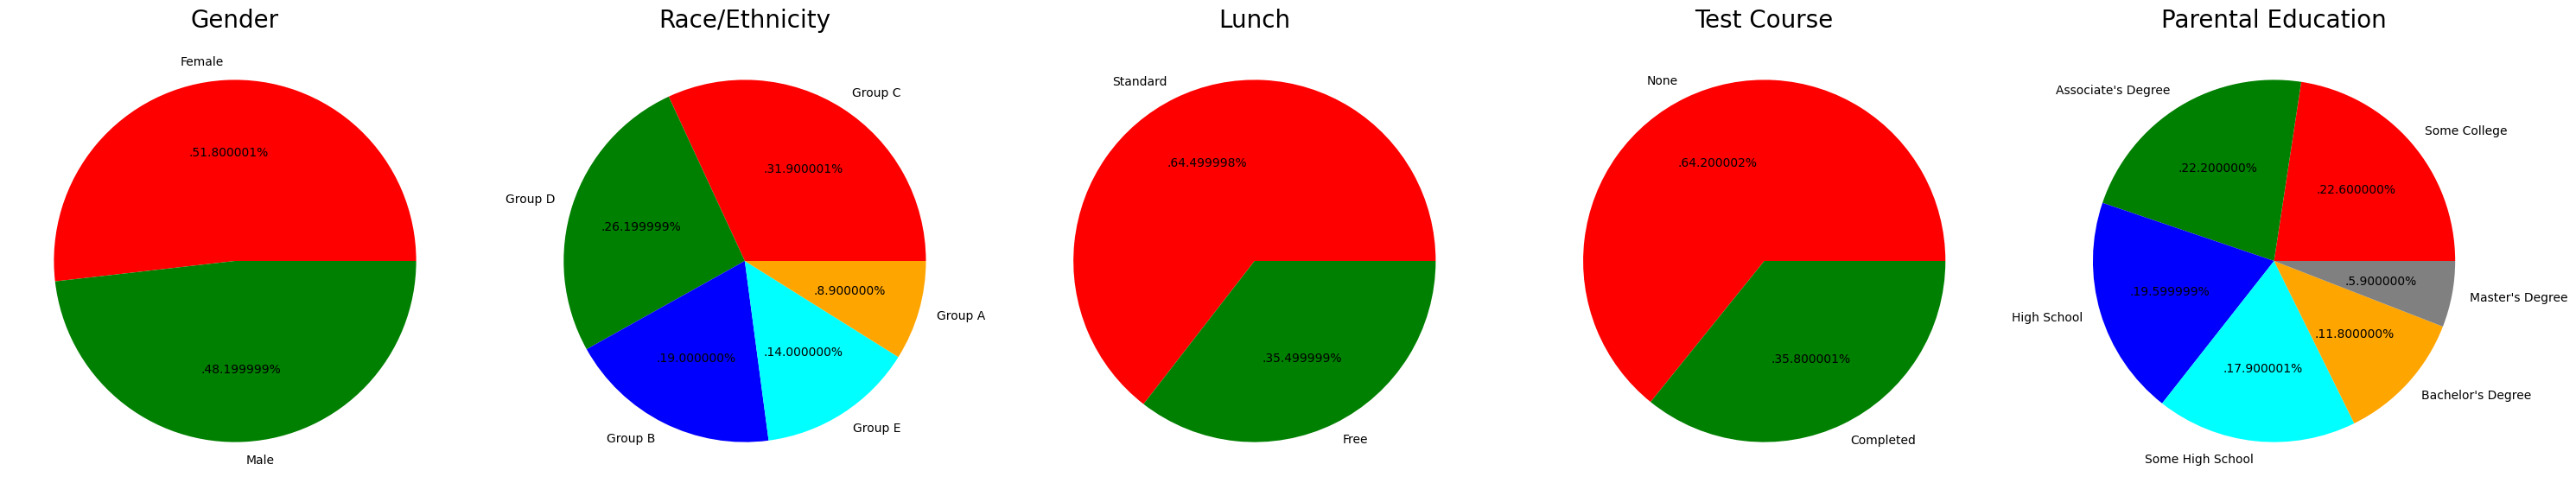

In [28]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### Observations:

- The number of male and female students is almost equal.
- The most students have ethnicity in group C, followed by group D and B, respectively.
- Standard luch has better impact in students' performance in exam.
- Students who did not complete a test course have better result in exam than those whose completed one.
- Students with their parental level of education is "Some College" and "Associate's Degree" tend to slightly perform better in exam.

### Feature Wise Visualization

### Gender Column

### Univariate Analysis (How is distribution of gender?)

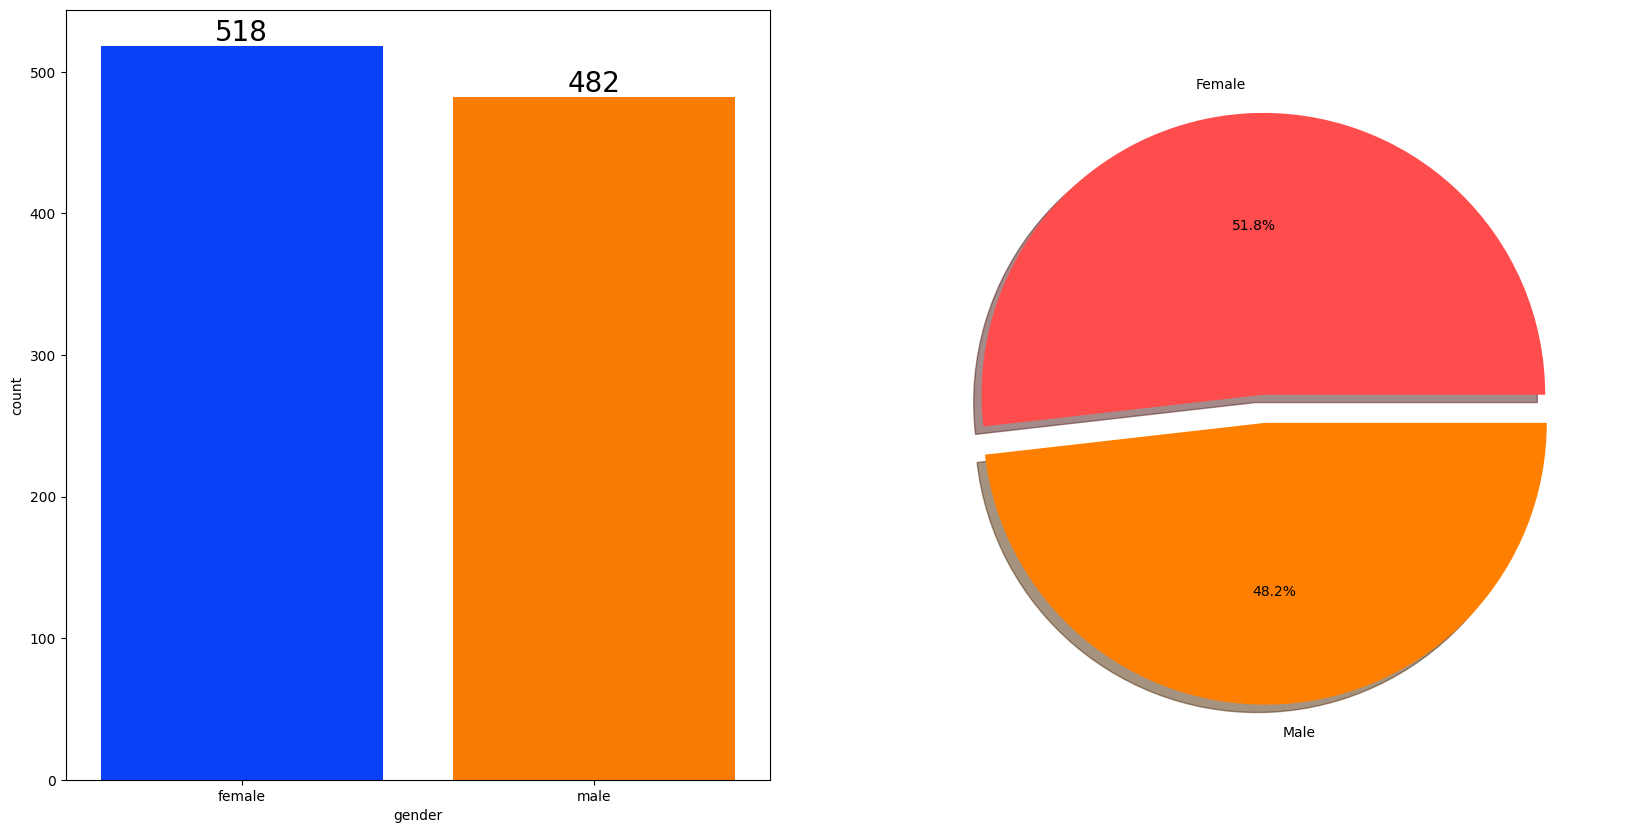

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

### Observation:

- There is a relative balance between female and male students taking part in exams with 52% and 48% respectively.

### Bivariate analysis (Does gender have any impact on student's performance?)

In [31]:
gender_group = df.groupby('gender').mean()
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


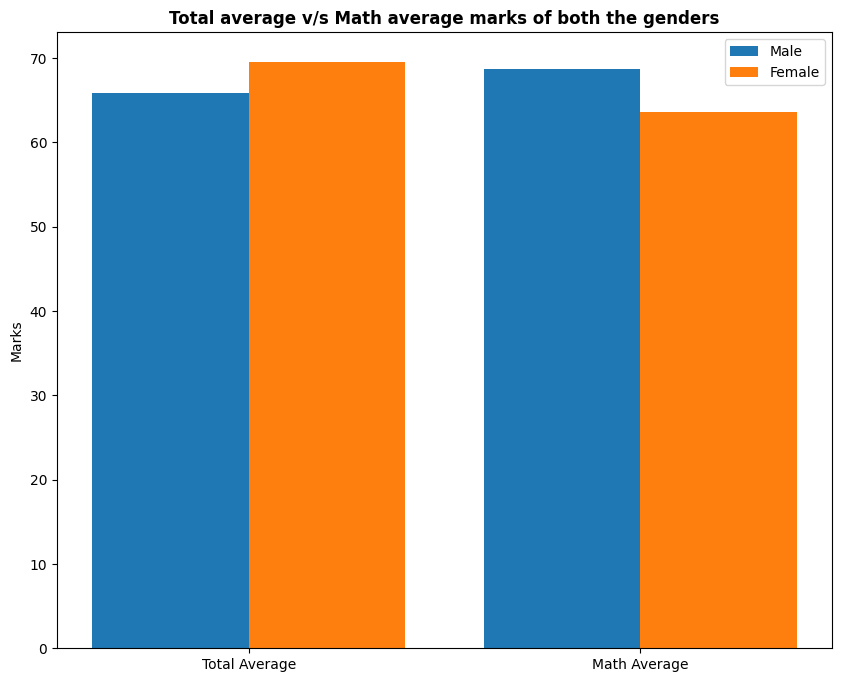

In [32]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

### Observations:

- In general, female students tend to have better performance than male students.
- But male students have higher grade in maths than female students.

### Race/ethnicity Column

### Univariate analysis (How is Group wise distribution?)

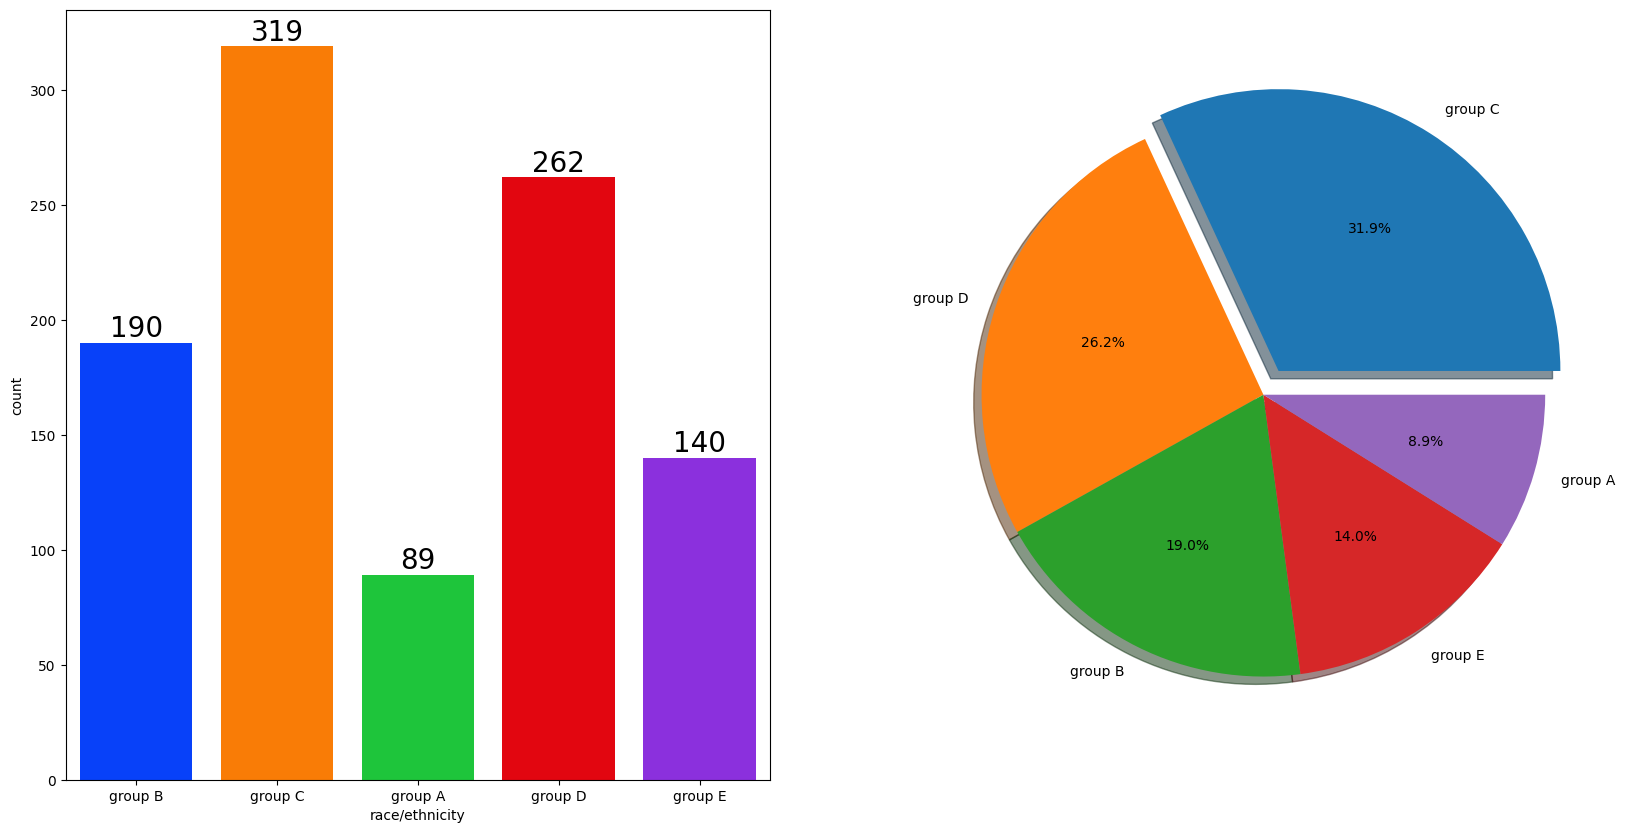

In [33]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

### Observations:

- Half of students are coming from group C and D, with 31.9% and 26.2% respectively.
- Group A has the lowest students.

### Bivariate analysis (Does Race/ethnicity have any impact on students' performance?)

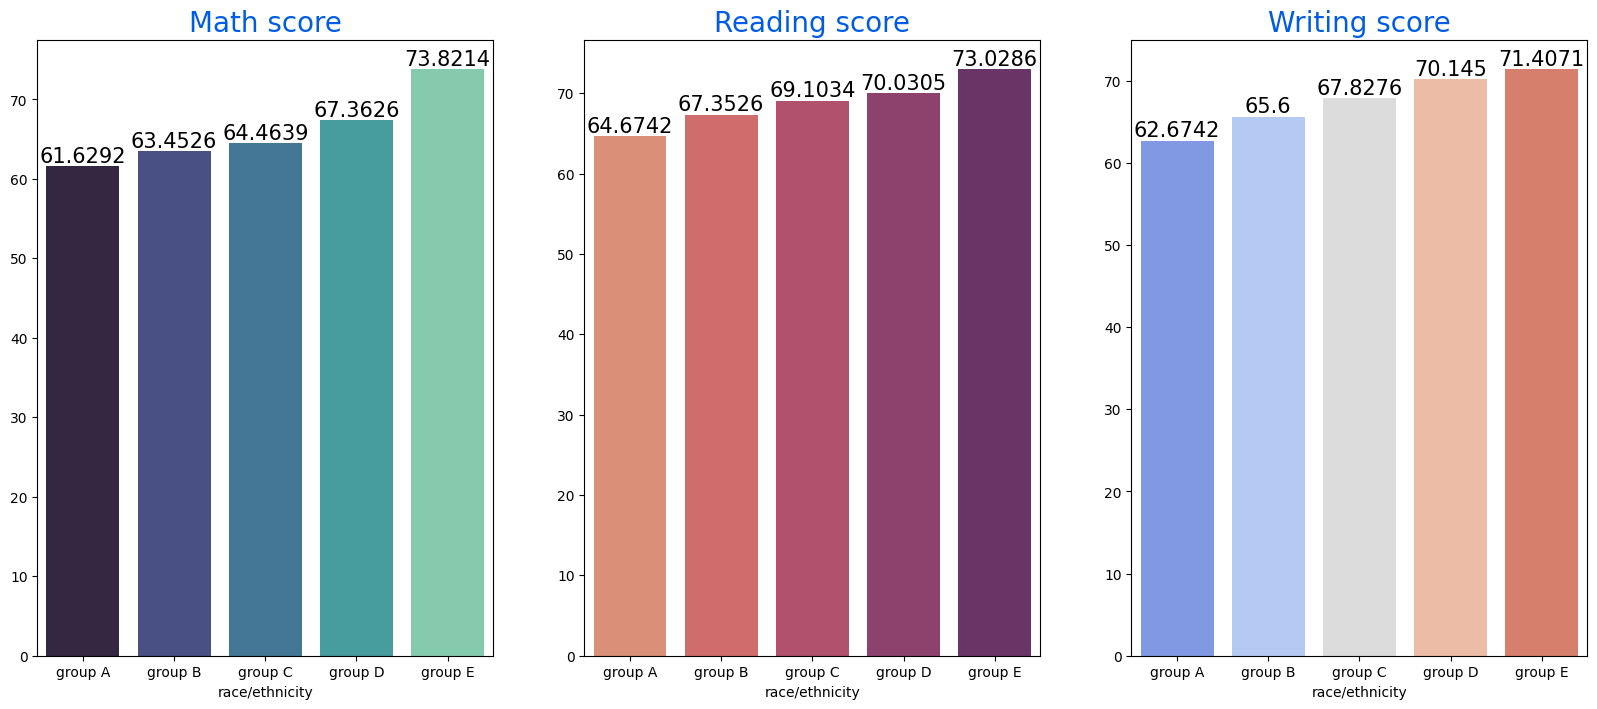

In [34]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

### Observations:

- Students in group E have the highest grade in all subjects.
- Students in group A have the lowest grade in all subjects.

### Parental level of education Column

### Univariate analysis (What is educational background of student's parents?)

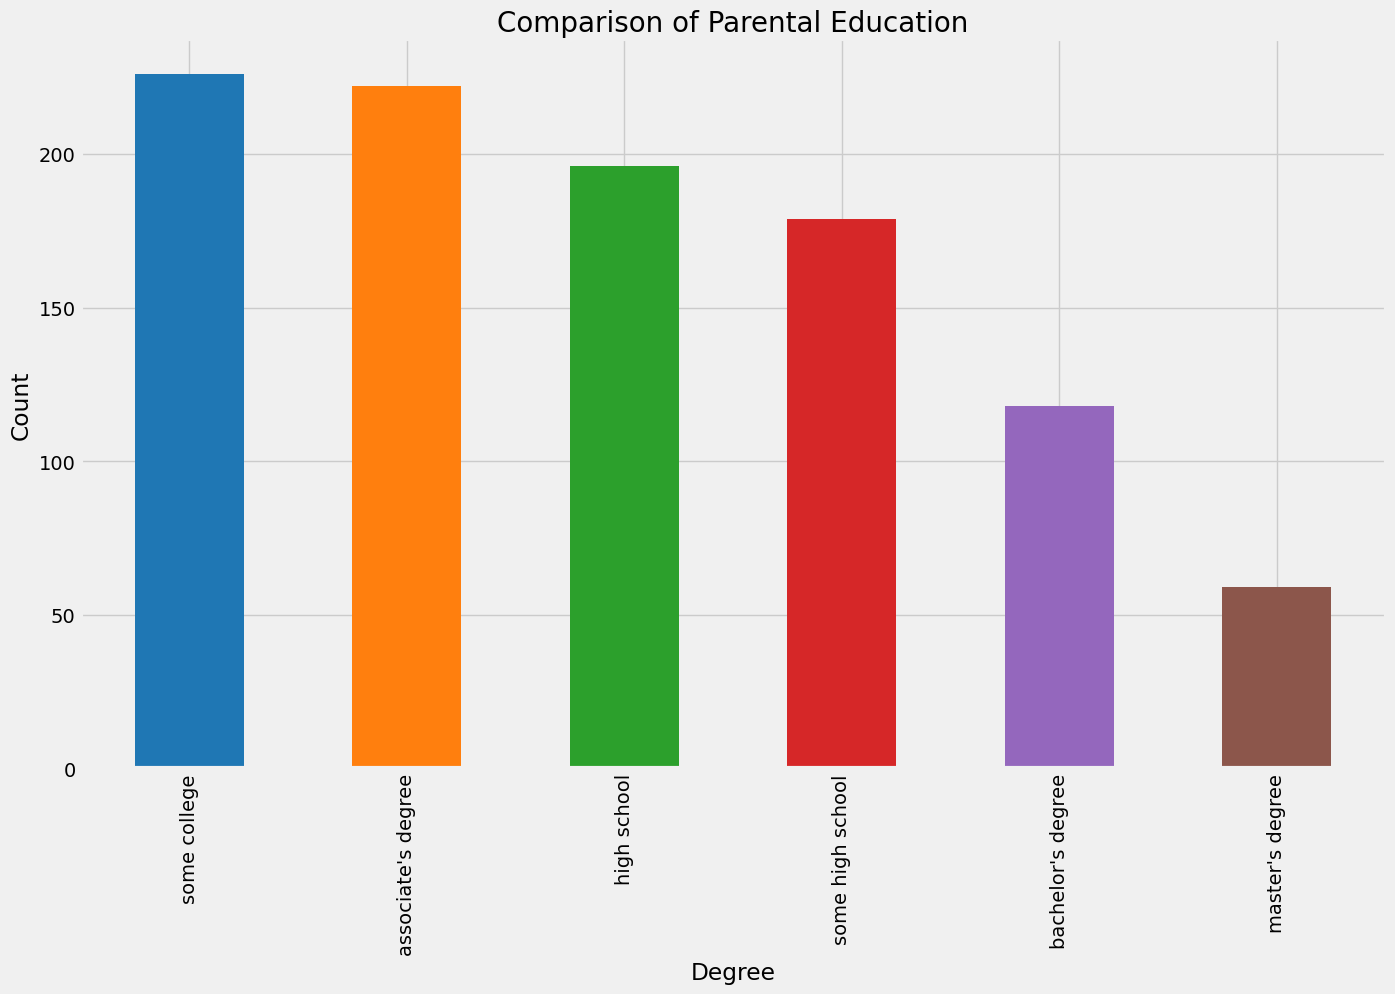

In [36]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

df['parental level of education'].value_counts().plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')

plt.show()

### Observation:

- Most of the students have parents with "some college" education background.

### Bivariate analysis (Does parental education have any impact of student's performance?)

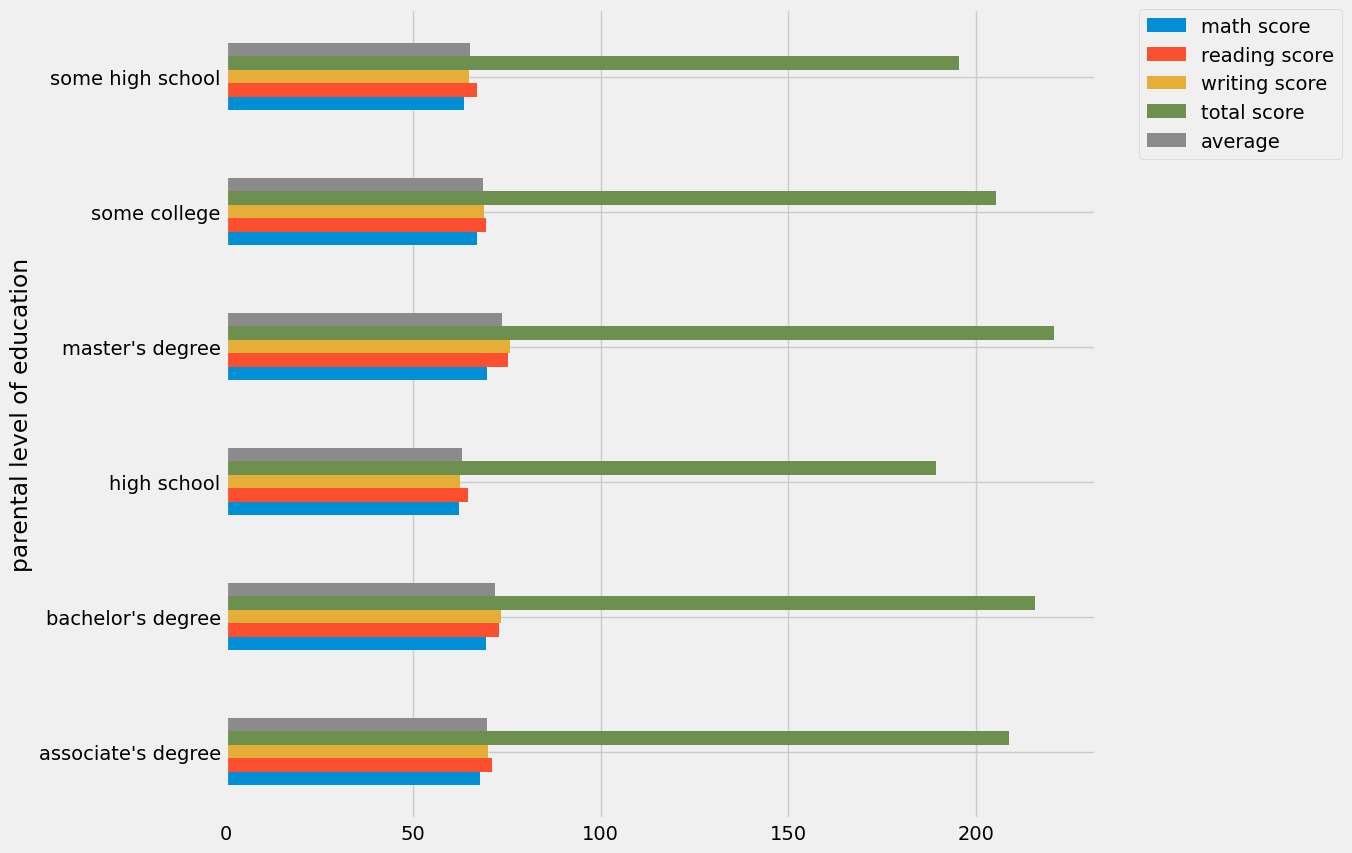

In [37]:
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Observation:

- The grade of students whose parents have master's degree and bachelor's degree are greater than others.

### Lunch Column

### Univariate analysis (Which type of lunch is the most common among students?)

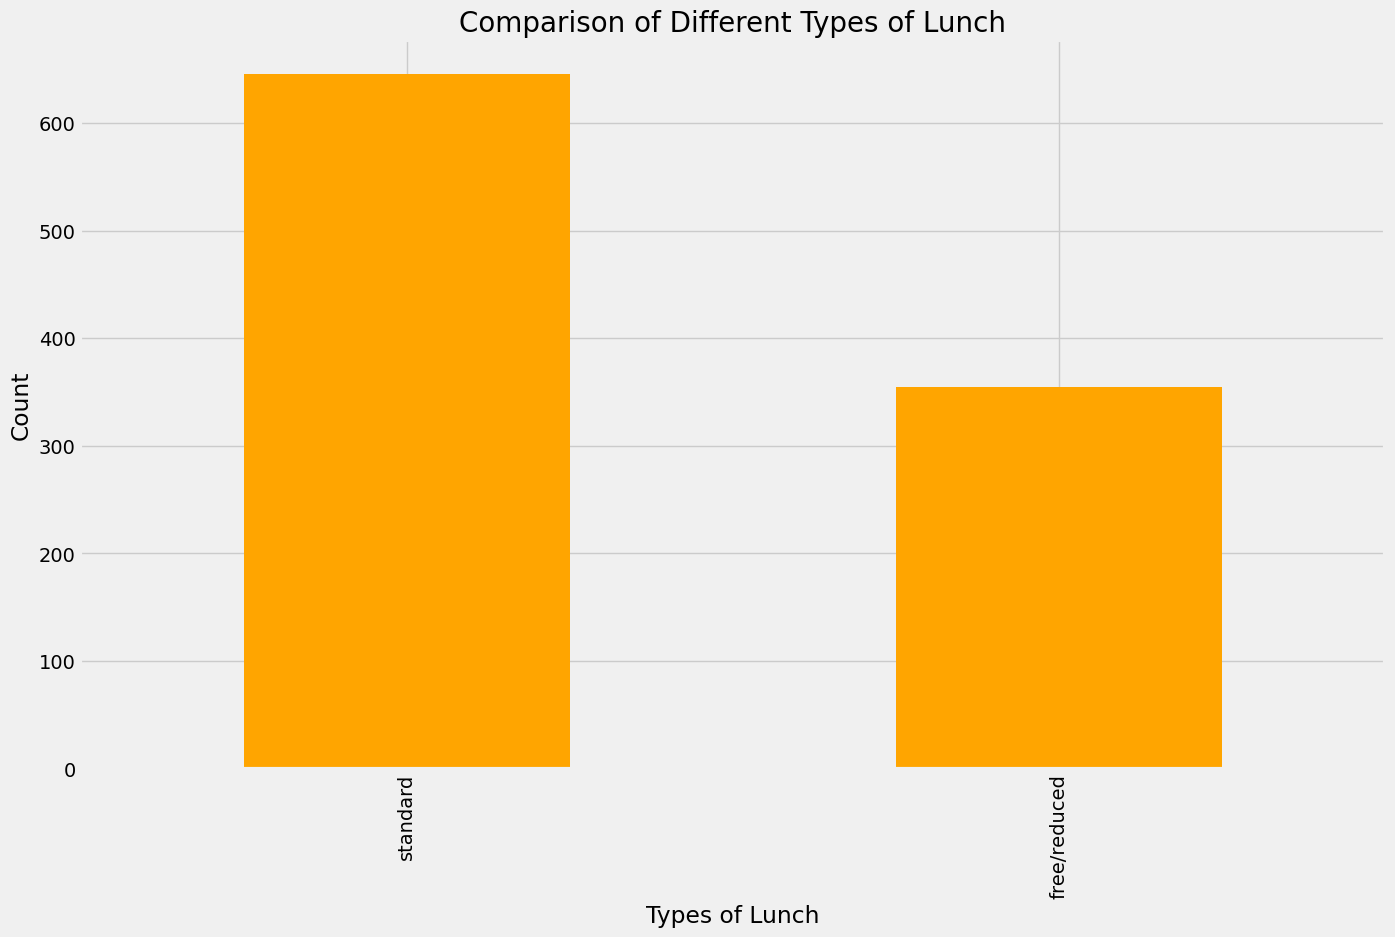

In [41]:
plt.rcParams['figure.figsize'] = (15, 9)

df['lunch'].value_counts().plot(kind='bar', color='Orange')

plt.title('Comparison of Different Types of Lunch', fontweight=30, fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')

plt.show()

### Observation:

- There are more students that have standard meals than the free/reduced ones.

### Bivariate analysis (Does lunch type intake have any impact on student's performance?)

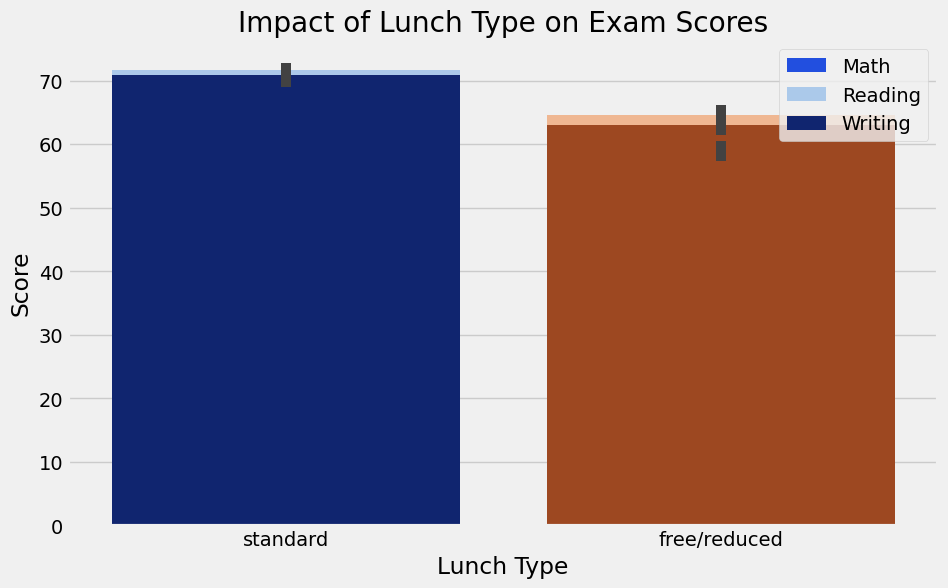

In [50]:
plt.figure(figsize=(10, 6))

sns.barplot(x='lunch', y='math score', data=df, palette='bright', label='Math')
sns.barplot(x='lunch', y='reading score', data=df, palette='pastel', label='Reading')
sns.barplot(x='lunch', y='writing score', data=df, palette='dark', label='Writing')

plt.title("Impact of Lunch Type on Exam Scores")
plt.xlabel("Lunch Type")
plt.ylabel("Score")
plt.legend()

plt.show()

### Observation:

- Students having standard lunch have better performance in all kinds of exam.

### Test preparation course Column

### Univariate analysis (Do students take test preparation course before exam?)

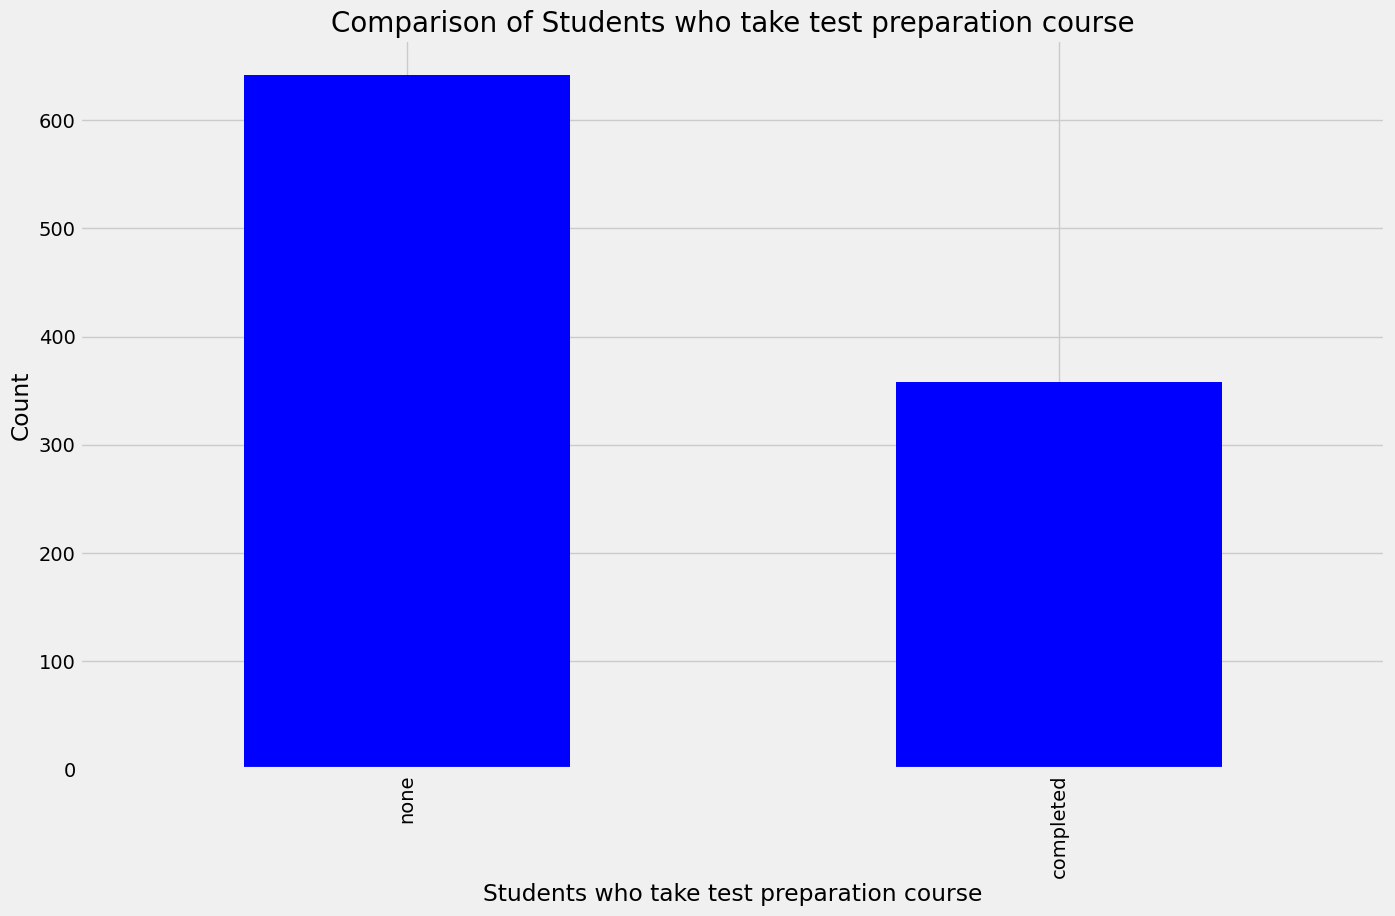

In [51]:
plt.rcParams['figure.figsize'] = (15, 9)

df['test preparation course'].value_counts().plot(kind='bar', color='blue')

plt.title('Comparison of Students who take test preparation course', fontweight=30, fontsize=20)
plt.xlabel('Students who take test preparation course')
plt.ylabel('Count')

plt.show()

### Observation:

- The number of students who do not take test preparation course before exam is double those who take.

### Bivariate analysis (Does Test preparation course have any impact on student's performance?)

<Axes: xlabel='lunch', ylabel='writing score'>

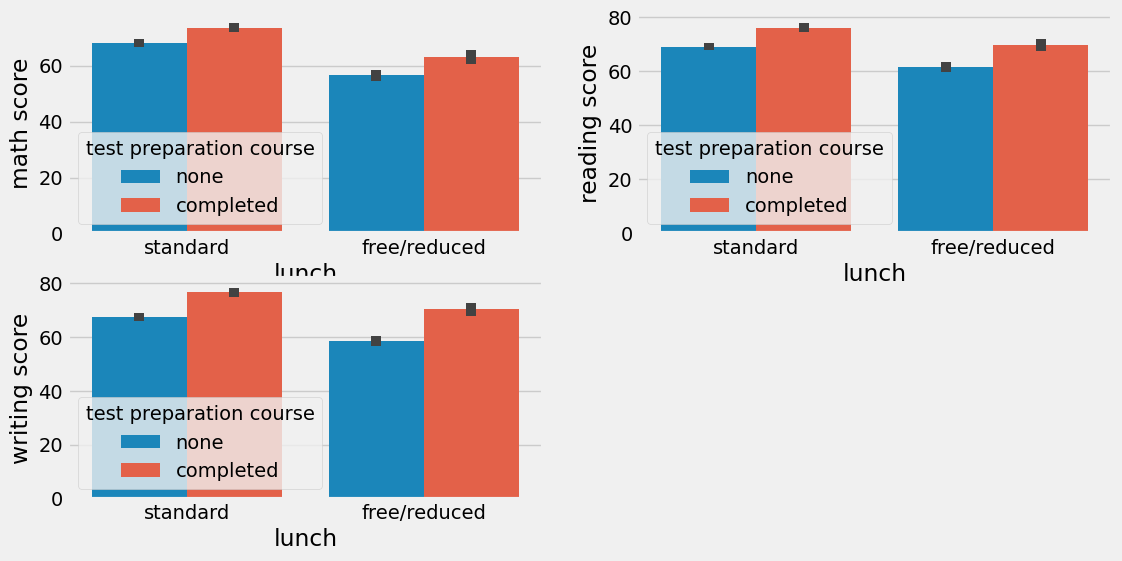

In [52]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

### Observation:

- Students who complete test preparation course tend to have better performance in all 3 exams.

### Check outliers

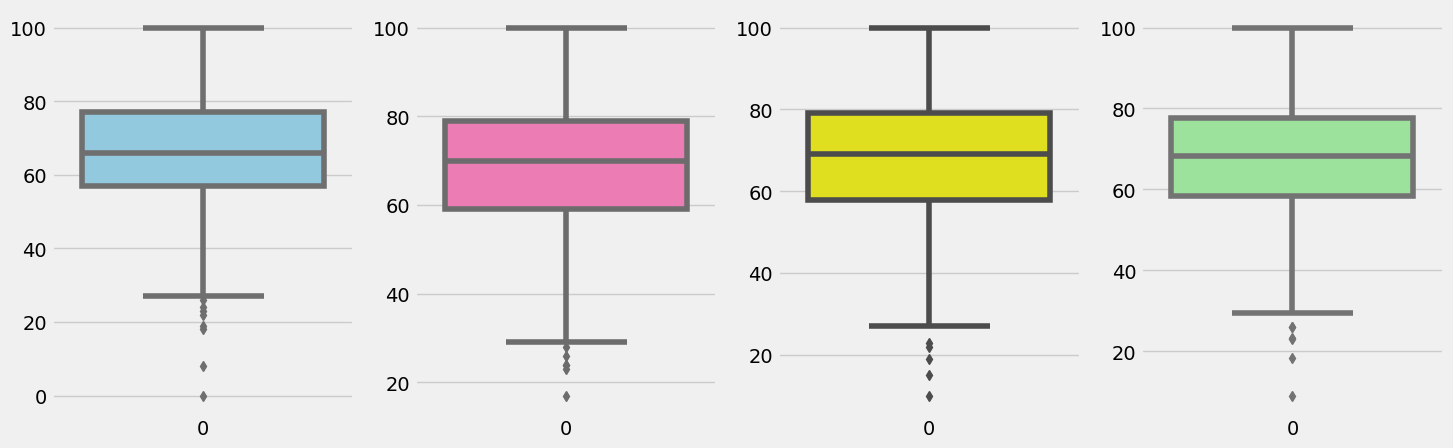

In [54]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

### Mutivariate analysis using pairplot

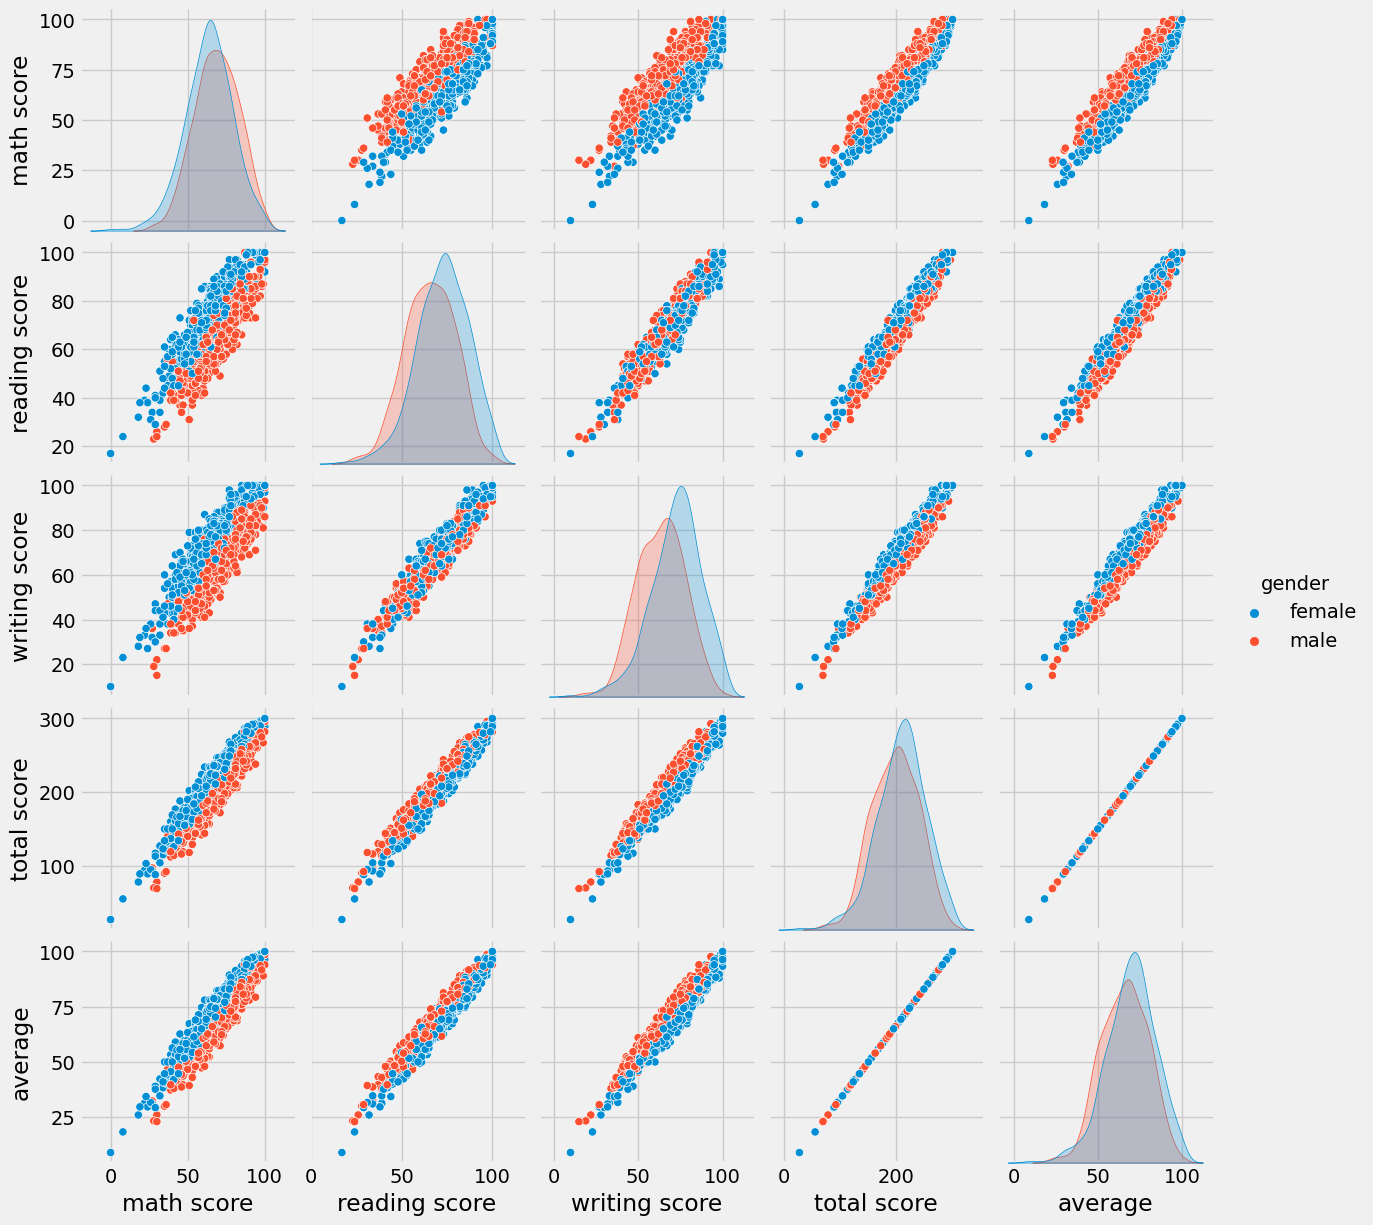

In [55]:
sns.pairplot(df,hue = 'gender')
plt.show()

### Observation:

- It is clear that all the scores increase linearly with each other.

## Conclusions:

- Student's performance is related with lunch, race and their parental level of education.
- Female students tend to have better performance in exam.
- Test preparation course does not have much effect on student' performance, however completing one is benificial.